In [13]:
import pandas as pd

In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Content')

In [ ]:
!unzip drive/MyDrive/Content/Training.zip

In [ ]:
!unzip drive/MyDrive/Content/Test.zip

In [32]:
from skimage.feature import hog

Using HOG_Feature_Vector to extract the feature vector

In [30]:
def hog_feature_vector(img):
    return hog(img, orientations=9, pixels_per_cell=(15, 15), cells_per_block=(3, 3), 
        block_norm='L2-Hys',visualize=False, transform_sqrt=False, feature_vector=True,
        multichannel=None,)

In [11]:
d = {}

for classes in os.listdir("Training"):
    all_images = os.listdir(f"Training/{classes}")
    temp = []
    for images in all_images:
        img = cv.imread(f"Training/{classes}/{images}")
        fv = hog_feature_vector(img)
        temp.append(fv)
    print(classes, "done")
    d[classes] = temp


Ginger Root done
Pear done
Cucumber Ripe 2 done
Dates done
Onion White done
Corn done
Mulberry done
Guava done
Physalis with Husk done
Grape Pink done
Eggplant done
Apple Red 3 done
Chestnut done
Potato Red Washed done
Apple Granny Smith done
Avocado ripe done
Tomato not Ripened done
Potato Sweet done
Apple Red 1 done
Apple Golden 3 done
Fig done
Potato White done
Tomato 1 done
Watermelon done
Kumquats done
Kiwi done
Papaya done
Mango done
Tomato 3 done
Tomato 2 done
Apple Crimson Snow done
Nut Forest done
Nectarine done
Pepper Red done
Pear Red done
Redcurrant done
Pepper Orange done
Limes done
Pear Forelle done
Cherry Wax Yellow done
Quince done
Kohlrabi done
Grapefruit White done
Cherry Wax Red done
Walnut done
Salak done
Apple Braeburn done
Apple Red Delicious done
Cherry Wax Black done
Pepino done
Pear Williams done
Strawberry Wedge done
Lemon done
Pineapple done
Tomato 4 done
Plum done
Pineapple Mini done
Tomato Heart done
Cantaloupe 1 done
Apricot done
Grapefruit Pink done
Straw

In [3]:
import pickle

In [13]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

In [5]:

with open('filename.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [6]:
len(d["Watermelon"])

475

In [34]:
x_train = []
y_train = []
cl = []
i = 0
for key, value in d.items():
    for each_array in value:
        x_train.append(each_array)
        temp = np.zeros(131)
        temp[i] = 1
        y_train.append(temp)
    cl.append(key)
    i += 1


In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
x_train.shape, y_train.shape

((67692, 1296), (67692, 131))

In [18]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [19]:
x_train_1 = x_train[:54000, :]
x_valid_1 = x_train[54000:, :]
y_train_1, y_valid_1 = y_train[:54000, :], y_train[54000:, :]

In [20]:
x_train_1.shape, y_train_1.shape, x_valid_1.shape, y_valid_1.shape

((54000, 1296), (54000, 131), (13692, 1296), (13692, 131))

In [21]:
x_train = x_train_1
x_valid = x_valid_1
y_train = y_train_1
y_valid = y_valid_1

In [22]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((54000, 1296), (54000, 131), (13692, 1296), (13692, 131))

In [23]:
# 1296
import tensorflow.keras as keras
num_categories = 131

# y_train = keras.utils.to_categorical(y_train, num_categories)
# y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [24]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape=(1296,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 131, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               664064    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 131)               67203     
                                                                 
Total params: 993,923
Trainable params: 993,923
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/20
1688/1688 [==============================] - 28s 16ms/step - loss: 1.0126 - accuracy: 0.7325 - val_loss: 0.2147 - val_accuracy: 0.9313
Epoch 2/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1161 - accuracy: 0.9623 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 3/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0574 - accuracy: 0.9814 - val_loss: 0.0318 - val_accuracy: 0.9903
Epoch 4/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0467 - accuracy: 0.9866 - val_loss: 0.0543 - val_accuracy: 0.9862
Epoch 5/20
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0402 - accuracy: 0.9892 - val_loss: 0.0625 - val_accuracy: 0.9834
Epoch 6/20
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.2361 - val_accuracy: 0.9571
Epoch 7/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0355 - accuracy: 0.9909 - val_loss: 0.0790 -

10000

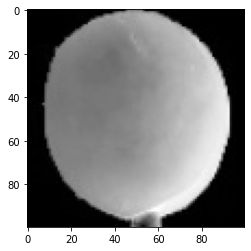

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
import numpy as np
image = Image.open('Test/Apricot/44_100.jpg').convert("L")
img = PIL.ImageOps.invert(image)
img_28x28 = np.array(img.resize((100, 100), Image.ANTIALIAS))
imagex = img_28x28
  
plt.imshow(imagex, cmap='gray')

imagex.size

In [39]:
import numpy as np
correct = 0
total = 0

In [ ]:
!unzip drive/MyDrive/Content/Test.zip

In [44]:
for folder in os.listdir("Test"):
    for each_image in os.listdir(f"Test/{folder}"):
        total += 1
        im22 = hog_feature_vector(cv.imread(f"Test/{folder}/{each_image}"))
        x = np.expand_dims(im22, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=131)
        a=max(classes[0])
        for i in range(len(classes[0])):
            if classes[0][i]==a:
                if(cl[i] == folder):
                    correct += 1
    print(correct, total)


1151 1486
1249 1650
1356 1806
1483 1972
1564 2118
1628 2268
1786 2432
1952 2598
2116 2762
2269 2926
2299 3082
2443 3226
2531 3379
2617 3530
2721 3694
2887 3860
3039 4018
3115 4168
3236 4332
3300 4493
3512 4727
3631 4877
3867 5123
3979 5280
4140 5446
4271 5602
4393 5766
4539 5932
4782 6178
5002 6403
5127 6551
5251 6769
5308 6933
5503 7155
5701 7377
5865 7541
6023 7775
6180 7941
6401 8175
6565 8339
6731 8505
6800 8662
6959 8826
7123 8990
7372 9239
7534 9401
7636 9565
7792 9731
7956 9895
8066 10061
8224 10227
8448 10473
8586 10637
8752 10803
8912 10963
9000 11114
9158 11277
9303 11505
9464 11669
9585 11833
9746 11999
9869 12163
10019 12316
10156 12468
10300 12621
10460 12781
10603 12947
10719 13089
10883 13253
11033 13403
11191 13567
11331 13715
11497 13881
11660 14045
11768 14205
11920 14369
12166 14615
12299 14781
12531 15015
12624 15181
12780 15345
13107 15673
13220 15895
13338 16061
13504 16227
13614 16369
13673 16519
13813 16683
13954 16849
14040 17003
14145 17169
14295 17333
14388 1

Testing over entire dataset

In [42]:
print("accuracy of the model", correct/total)

accuracy of the model 0.7642393655371305
